In [ ]:
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
with open('corpus.txt', 'r', encoding='utf-8') as file:
    text = file.read()

print(text[:500])   # preview first 500 characters


CHAPTER I


“Tom!”

No answer.

“TOM!”

No answer.

“What’s gone with that boy, I wonder? You TOM!”

No answer.

The old lady pulled her spectacles down and looked over them about the
room; then she put them up and looked out under them. She seldom or
never looked _through_ them for so small a thing as a boy; they were
her state pair, the pride of her heart, and were built for “style,” not
service—she could have seen through a pair of stove-lids just as well.
She looked perplexed for a moment, a


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
tokens = word_tokenize(text.lower())
tokens = [word for word in tokens if word.isalpha()]


In [ ]:
N = len(tokens)
V = len(set(tokens))

print("Total number of tokens (N):", N)
print("Total number of unique word types (V):", V)


Total number of tokens (N): 72574
Total number of unique word types (V): 7242


In [ ]:
vocab_sizes = []
unique_words = set()

for i, word in enumerate(tokens):
    unique_words.add(word)
    vocab_sizes.append(len(unique_words))

token_counts = np.arange(1, len(tokens) + 1)


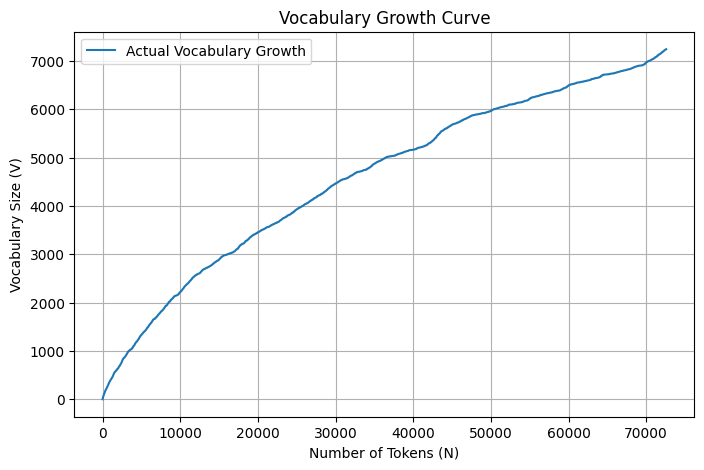

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(token_counts, vocab_sizes, label='Actual Vocabulary Growth')
plt.xlabel("Number of Tokens (N)")
plt.ylabel("Vocabulary Size (V)")
plt.title("Vocabulary Growth Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
log_N = np.log(token_counts)
log_V = np.log(vocab_sizes)

beta, log_k = np.polyfit(log_N, log_V, 1)
k = np.exp(log_k)

print("Estimated β (beta):", beta)
print("Estimated k:", k)


Estimated β (beta): 0.6646683509547452
Estimated k: 4.531192974273224


In [ ]:
heap_prediction = k * (token_counts ** beta)


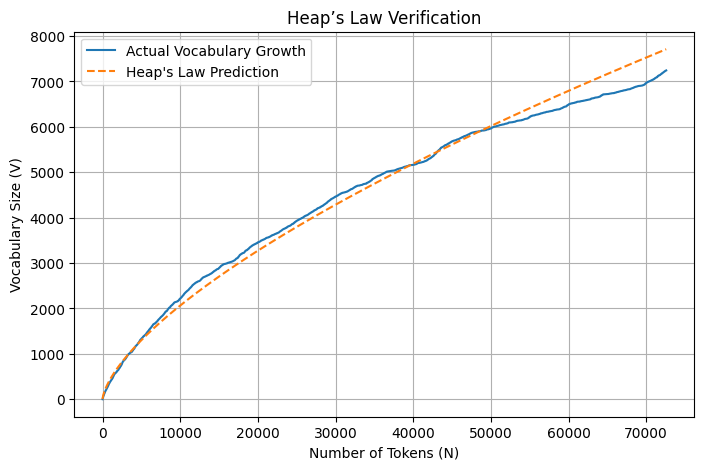

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(token_counts, vocab_sizes, label='Actual Vocabulary Growth')
plt.plot(token_counts, heap_prediction, linestyle='dashed', label="Heap's Law Prediction")
plt.xlabel("Number of Tokens (N)")
plt.ylabel("Vocabulary Size (V)")
plt.title("Heap’s Law Verification")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("""
Observation:
The predicted Heap’s Law curve closely follows the actual vocabulary growth curve.

Conclusion:
Heap’s Law holds reasonably well for the given corpus, confirming that vocabulary
growth increases sub-linearly with corpus size.
""")



Observation:
The predicted Heap’s Law curve closely follows the actual vocabulary growth curve.

Conclusion:
Heap’s Law holds reasonably well for the given corpus, confirming that vocabulary
growth increases sub-linearly with corpus size.

